In [1]:
%matplotlib inline


# Outlier detection with Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection
method which computes the local density deviation of a given data point with
respect to its neighbors. It considers as outliers the samples that have a
substantially lower density than their neighbors. This example shows how to
use LOF for outlier detection which is the default use case of this estimator
in scikit-learn. Note that when LOF is used for outlier detection it has no
predict, decision_function and score_samples methods. See
`User Guide <outlier_detection>`: for details on the difference between
outlier detection and novelty detection and how to use LOF for novelty
detection.

The number of neighbors considered (parameter n_neighbors) is typically
set 1) greater than the minimum number of samples a cluster has to contain,
so that other samples can be local outliers relative to this cluster, and 2)
smaller than the maximum number of close by samples that can potentially be
local outliers.
In practice, such informations are generally not available, and taking
n_neighbors=20 appears to work well in general.


Automatically created module for IPython interactive environment


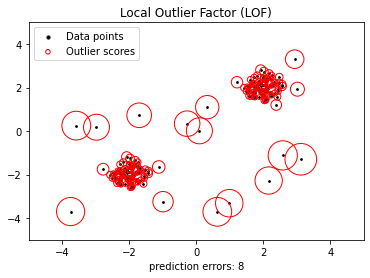

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()